# curating  data for an area of interest

- easy to do a for a single AOI, just update and re-run script for different AOI.
Inefficient as we start wanting to look at more.
- Update code relative to `aoi_calculations.ipynb` to try to keep things grouped
by region


# Import general packages


In [1]:
import stitches

import pandas as pd
import pkg_resources
import xarray as xr
import numpy as np
import seaborn as sns

In [1]:
esms = ['ACCESS-CM2',
       'AWI-CM-1-1-MR',
       'AWI-ESM-1-1-LR',
       'BCC-CSM2-HR',
       'BCC-CSM2-MR',
       'BCC-ESM1',
       'CESM1-1-CAM5-CMIP5',
       'CESM1-WACCM-SC',
       'CESM2',
       'CESM2-FV2',
       'CESM2-WACCM-FV2',
       'CIESM',
       'CMCC-CM2-HR4',
       'CMCC-CM2-SR5',
       'CMCC-CM2-VHR4',
       'CMCC-ESM2',
       'CNRM-CM6-1',
       'CNRM-CM6-1-HR',
       'CNRM-ESM2-1',
       'CanESM5-CanOE',
       'E3SM-1-0',
       'E3SM-1-1',
       'E3SM-1-1-ECA',
       'EC-Earth3',
       'EC-Earth3-AerChem',
       'EC-Earth3-CC',
       'EC-Earth3-LR',
       'EC-Earth3-Veg',
       'EC-Earth3-Veg-LR',
       'EC-Earth3P',
       'EC-Earth3P-HR',
       'EC-Earth3P-VHR',
       'ECMWF-IFS-HR',
       'ECMWF-IFS-LR',
       'FGOALS-f3-H',
       'FGOALS-f3-L',
       'FIO-ESM-2-0',
       'GFDL-AM4',
       'GFDL-CM4',
       'GFDL-CM4C192',
       'GFDL-ESM2M',
       'GFDL-OM4p5B',
       'GISS-E2-1-G',
       'GISS-E2-1-G-CC',
       'GISS-E2-1-H',
       'GISS-E2-2-G',
       'GISS-E2-2-H',
       'HadGEM3-GC31-HM',
       'HadGEM3-GC31-LL',
       'HadGEM3-GC31-LM',
       'HadGEM3-GC31-MM',
       'ICON-ESM-LR',
       'IITM-ESM',
       'INM-CM4-8',
       'INM-CM5-0',
       'INM-CM5-H',
       'IPSL-CM5A2-INCA',
       'IPSL-CM6A-ATM-HR',
       'IPSL-CM6A-LR-INCA',
       'KACE-1-0-G',
       'KIOST-ESM',
       'MCM-UA-1-0',
       'MIROC-ES2H',
       'MIROC-ES2L',
       'MPI-ESM-1-2-HAM',
       'MPI-ESM1-2-XR',
       'MRI-AGCM3-2-H',
       'MRI-AGCM3-2-S',
       'MRI-ESM2-0',
       'NESM3',
       'NorCPM1',
       'NorESM1-F',
       'NorESM2-MM',
       'SAM0-UNICON',
       'TaiESM1'
       'HadGEM3-GC31-LL',
       'NorESM2-LM'
       ]

In [2]:
len(esms)

76

In [2]:
# Plotting options
sns.set(font_scale=1.3)
sns.set_style("white")
# For help with plotting
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 12, 6
pd.set_option('display.max_columns', None)

# import packages for spatial masking

In [6]:
import geopandas as gpd
# Spatial subsetting of netcdf files:
import regionmask

#  Set up time slices and area of interest (AOI) to focus on

- require ensemble average PR values over the ref period and comparison period
for an area of interest
- Do spatial aggregation for each ensemble member, take the time average in the
time window, calculate average across ensemble members

In [5]:
# Time slices
ref_start = 1980
ref_end =  2014

comp_start = 2015
comp_end =  2099

In [ ]:
# AOI
# working off https://www.earthdatascience.org/courses/use-data-open-source-python/hierarchical-data-formats-hdf/subset-netcdf4-climate-data-spatially-aoi/

# # physical land polygon files:
# url =  (    "https://naturalearth.s3.amazonaws.com/"
# "10m_physical/ne_10m_land.zip")

# # country URL
# url =  (    "https://naturalearth.s3.amazonaws.com/"
#             "10m_cultural/ne_10m_admin_0_countries.zip")

# # state/province URL
# url =  (    "https://naturalearth.s3.amazonaws.com/"
#             "10m_cultural/ne_10m_admin_1_states_provinces.zip")

## Plot of IPCC Regoins

<AxesSubplot:>

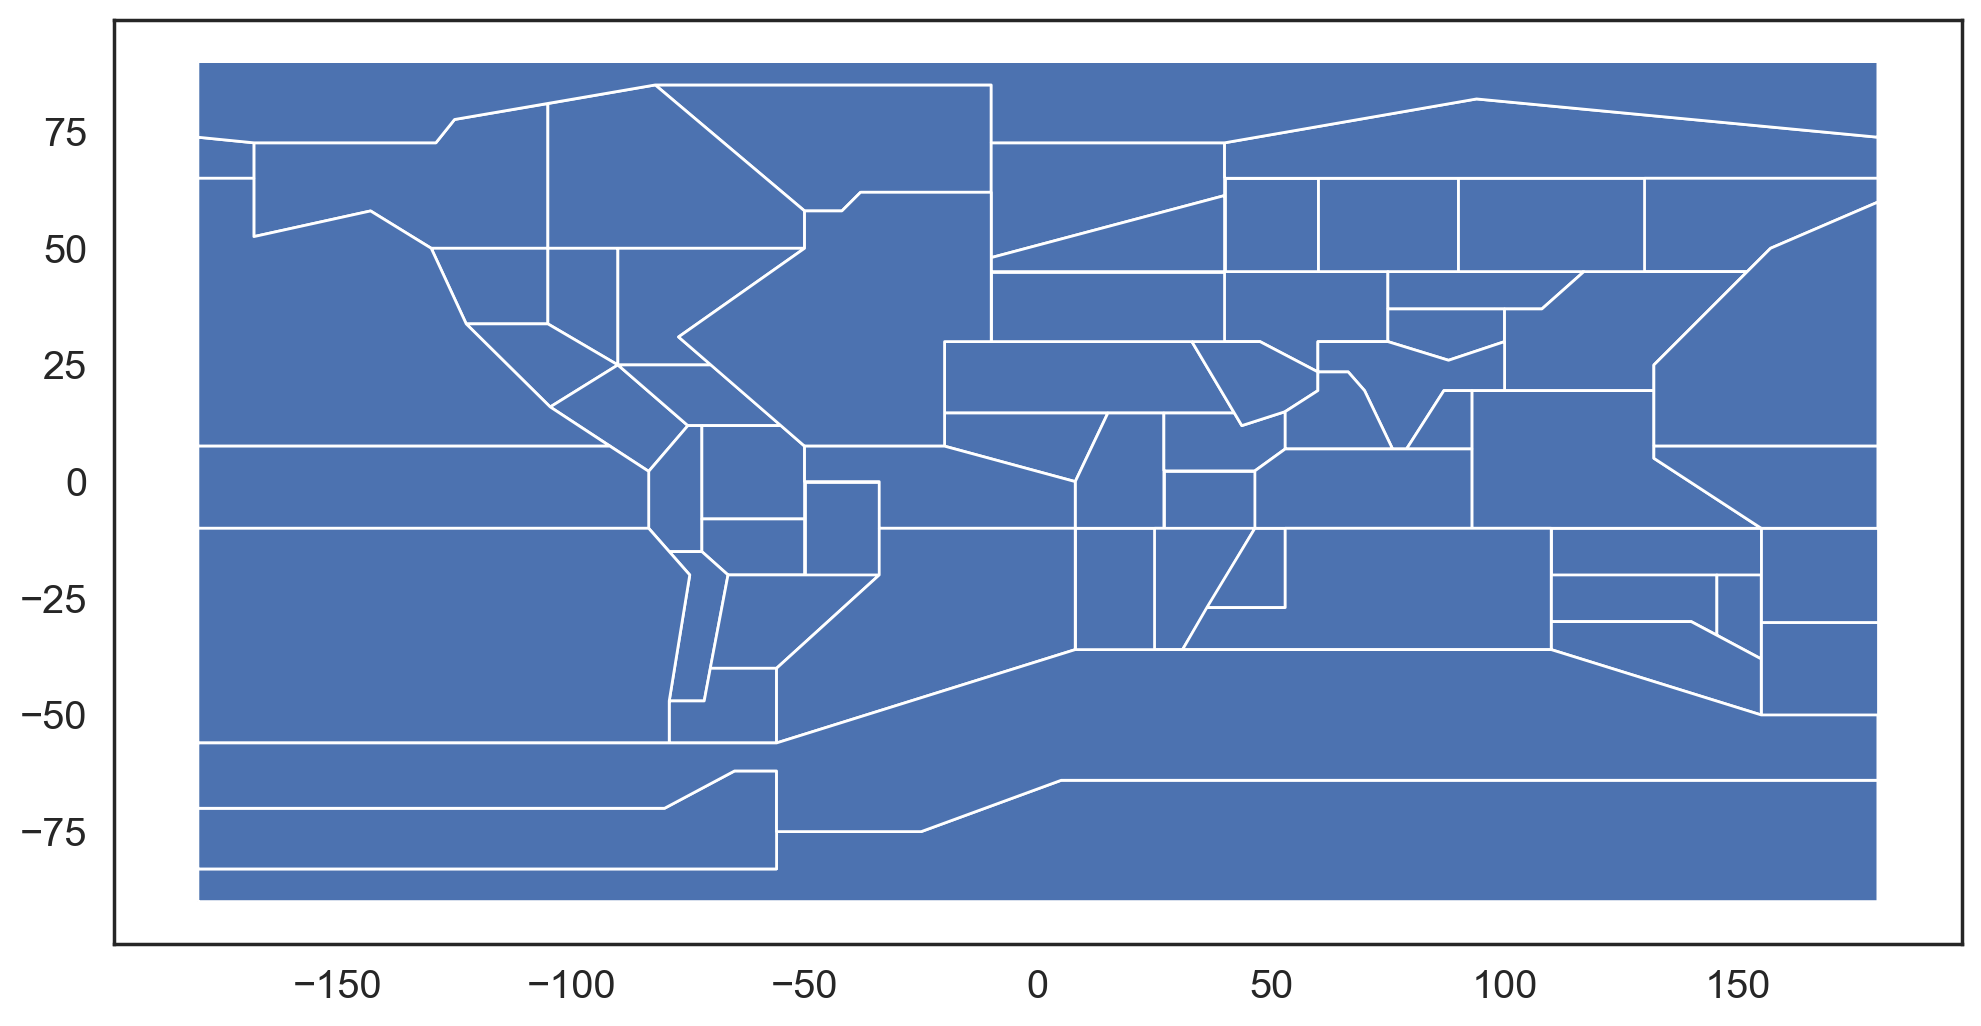

In [7]:
# IPCC ar6 reference regions - including ocean regions
# actually have to download locally from
# https://github.com/IPCC-WG1/Atlas/blob/main/reference-regions/IPCC-WGI-reference-regions-v4_shapefile.zip

# Load in data
url = 'IPCC-WGI-reference-regions-v4_shapefile.zip'
land_main_gdf = gpd.read_file(url)
IPCC_names  = land_main_gdf['Acronym'].unique()

# make plot
land_main_gdf.plot()

# specify ESMs, variables, experiments

In [51]:
# The CMIP6 ESM we want to emulate and the variables we want to
# emulate
# NOTE IPSL and GFDL submitted results under grids labeled not `gn` so they
# are not included in the stitches patches data. To pull their ESMs, we have to
# source the pangeo table directly from pangeo and reshape it instead of using
# the stitches package data.

esm = ['MIROC6']
vars1 = ['pr']
exps = ['historical', 'ssp245']
ensembles = ['r1i1p1f1']

esm = ['CAMS-CSM1-0', 'MIROC6', 'GFDL-ESM4', 'FGOALS-g3',
'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'MRI-ESM2-0',
'ACCESS-ESM1-5', 'IPSL-CM6A-LR', 'CESM2-WACCM',
'UKESM1-0-LL',
'CanESM5']
#
vars1 = ['pr', 'tas']
#
exps = ['historical',
        'ssp126', 'ssp245', 'ssp370',  'ssp585',
        'ssp460', 'ssp119',   'ssp434', 'ssp534-over']

# Pull pangeo dataframe with netcdf addresses for above

In [9]:
import intake
import fsspec

In [11]:
# TODO: Ask about this and why it's important
# Don't know what this does
url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
out = intake.open_esm_datastore(url)

In [72]:
# Initial pangeo table of ESMs for reference
pangeo_data = stitches.fx_pangeo.fetch_pangeo_table()
pangeo_data

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
...,...,...,...,...,...,...,...,...,...,...,...
514813,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
514814,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tauu,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
514815,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,hur,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207
514816,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,hus,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,NaN,20211207


In [73]:
# Extracting just the desired models, variables, scenarios we want
pangeo_data = pangeo_data[(pangeo_data['source_id'].isin(esm)) &
                          (pangeo_data['variable_id'].isin(vars1)) &
                          (pangeo_data['table_id'] == 'Amon') &
                          (pangeo_data['experiment_id'].isin(exps))].copy()

# reshape to look like package data but with the ESMs we want to include
pangeo_data = pangeo_data[["source_id", "experiment_id", "member_id", "variable_id", "grid_label",
                                                        "zstore", "table_id"]].copy()
pangeo_data = pangeo_data.rename(columns={"source_id": "model", "experiment_id": "experiment",
                                                "member_id": "ensemble", "variable_id": "variable",
                                                "zstore": "zstore", "table_id": "domain"}).reset_index(drop = True).copy()

 # keep only p1 runs:
# UK model only does f2 runs for some reason
# What are f2 vs f1 runs?
ukesm_data =  pangeo_data[pangeo_data['model'].str.contains('UKESM')].copy()
ukesm_data = ukesm_data[ukesm_data['ensemble'].str.contains('i1p1f2')].copy()

# everyone else does f1 runs
pangeo_data = pangeo_data[pangeo_data['ensemble'].str.contains('i1p1f1')].copy()

# combine UKESM with other models
pangeo_data = pd.concat([pangeo_data, ukesm_data]).reset_index(drop=True).copy()
pangeo_data

,model,experiment,ensemble,variable,grid_label,zstore,domain
0,GFDL-ESM4,historical,r3i1p1f1,tas,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/hist...,Amon
1,GFDL-ESM4,historical,r3i1p1f1,pr,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/hist...,Amon
2,GFDL-ESM4,historical,r2i1p1f1,tas,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/hist...,Amon
3,GFDL-ESM4,historical,r2i1p1f1,pr,gr1,gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/hist...,Amon
4,GFDL-ESM4,ssp119,r1i1p1f1,tas,gr1,gs://cmip6/CMIP6/ScenarioMIP/NOAA-GFDL/GFDL-ES...,Amon
...,...,...,...,...,...,...,...
1734,UKESM1-0-LL,ssp245,r18i1p1f2,tas,gn,gs://cmip6/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/...,Amon
1735,UKESM1-0-LL,ssp245,r7i1p1f2,tas,gn,gs://cmip6/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/...,Amon
1736,UKESM1-0-LL,ssp245,r7i1p1f2,pr,gn,gs://cmip6/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/...,Amon
1737,UKESM1-0-LL,ssp245,r12i1p1f2,pr,gn,gs://cmip6/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/...,Amon


In [74]:
ensembles = np.unique(pangeo_data.ensemble.values)

# loop over files and do calculations

In [13]:
aoi = land_main_gdf.reset_index(drop=True).copy()
# aoi = aoi[aoi['Type']!= 'Ocean'].copy()
# aoi = aoi[aoi['Continent'] != 'POLAR'].reset_index(drop=True).copy()

aoi_labels = aoi[['Continent', 'Type', 'Name', 'Acronym']].copy()
aoi_labels = aoi_labels.rename(columns={'Continent':'continent',
                                        'Type':'type',
                                        'Name':'name',
                                        'Acronym':'acronym'}).copy()
aoi_labels['region'] = aoi_labels.index.copy()
aoi

,Continent,Type,Name,Acronym,geometry
0,POLAR,Land,Greenland/Iceland,GIC,"POLYGON ((-10.00000 62.00000, -10.43750 62.000..."
1,NORTH-AMERICA,Land,N.W.North-America,NWN,"POLYGON ((-105.00000 50.00000, -105.43860 50.0..."
2,NORTH-AMERICA,Land,N.E.North-America,NEN,"POLYGON ((-50.00000 50.00000, -50.44000 50.000..."
3,NORTH-AMERICA,Land,W.North-America,WNA,"POLYGON ((-130.00000 50.00000, -129.56140 50.0..."
4,NORTH-AMERICA,Land,C.North-America,CNA,"POLYGON ((-90.00000 50.00000, -90.00000 49.561..."
5,NORTH-AMERICA,Land,E.North-America,ENA,"POLYGON ((-70.00000 25.00000, -70.43478 25.000..."
6,CENTRAL-AMERICA,Land,N.Central-America,NCA,"POLYGON ((-90.00000 25.00000, -90.37179 24.769..."
7,CENTRAL-AMERICA,Land,S.Central-America,SCA,"POLYGON ((-75.00000 12.00000, -75.28000 11.673..."
8,CENTRAL-AMERICA,Land-Ocean,Caribbean,CAR,"POLYGON ((-75.00000 12.00000, -75.32609 12.282..."
9,SOUTH-AMERICA,Land,N.W.South-America,NWS,"POLYGON ((-75.00000 12.00000, -74.57143 12.000..."


In [14]:
# Example masking
file_url = pangeo_data[(pangeo_data['model'] == 'MIROC6') &
                       (pangeo_data['experiment'] == 'ssp245') &
                       (pangeo_data['ensemble'] == 'r36i1p1f1') &
                       (pangeo_data['variable'] == 'pr')].iloc[0].zstore

matched_data = stitches.fx_pangeo.fetch_nc(file_url)
matched_data = matched_data.sortby('time').copy()

# Get masks for regions
region_masks = regionmask.mask_3D_geopandas(aoi, matched_data.lon, matched_data.lat)

In [15]:
region_masks

<xarray.DataArray 'mask' (region: 58, lat: 128, lon: 256)>
array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
...
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]])
Coordinates:
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * region   (region) int64 0 1 2 3 4 5 6 7 8 9 ... 49 50 51 52 53 54 55 56 57

In [16]:
matched_data

<xarray.Dataset>
Dimensions:    (lat: 128, bnds: 2, lon: 256, time: 1032)
Coordinates:
  * lat        (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(128, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(256, 2), meta=np.ndarray>
  * time       (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(1032, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    pr         (time, lat, lon) float32 dask.array<chunksize=(488, 128, 256), meta=np.ndarray>
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60265.0
    branch_time_in_parent:  60265.0
    cmor_version:           3.5.0
    ...                     ...
    table_info:             Creation Date:(22 July 2019) MD5:b4cefb4b6dbb146f...
    title:                  MIROC6 output prepared for CMIP6
    tracking_id:            hdl:21.14100/85e3bbdf-fd1f-4990-ad7a-582bd3da2f7f
    variable_id:            pr
    variant_label:          r36i1p1f1
    version_id:             v20210917

In [17]:
matched_data.where(region_masks).copy()

<xarray.Dataset>
Dimensions:    (time: 1032, lat: 128, lon: 256, region: 58, bnds: 2)
Coordinates:
  * lat        (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(128, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(256, 2), meta=np.ndarray>
  * time       (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(1032, 2), meta=np.ndarray>
  * region     (region) int64 0 1 2 3 4 5 6 7 8 9 ... 49 50 51 52 53 54 55 56 57
Dimensions without coordinates: bnds
Data variables:
    pr         (time, lat, lon, region) float32 dask.array<chunksize=(488, 128, 256, 58), meta=np.ndarray>
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60265.0
    branch_time_in_parent:  60265.0
    cmor_version:           3.5.0
    ...                     ...
    table_info:             Creation Date:(22 July 2019) MD5:b4cefb4b6dbb146f...
    title:                  MIROC6 output prepared for CMIP6
    tracking_id:            hdl:21.14100/85e3bbdf-fd1f-4990-ad7a-582bd3da2f7f
    variable_id:            pr
    variant_label:          r36i1p1f1
    version_id:             v20210917

In [27]:
len(aoi)

58

# Helper Functions

In [78]:
def get_template_arr(full_arr: xr.DataArray, variable: str):
    """
    Returns a xarray in with the same coords, dims and chunks as the output from the map_blocks function
    in conjunction with `annual_area_weighted_mean`. This is done so that Dask can pre-specify the
    output specifications.

    :param full_arr: xr.DataArray
        What will be passed to `map_blocks`, a chunked xr.DataArray with coords lat, lon, time, region
    :return: template: xr.DataArray
        An empty xarray of the form of the output of `map_blocks`
    """
    # Get example of the output after doing the coarsening and getting annual values
    template = full_arr[dict(region=1)].mean(("lon", "lat")).coarsen(time=12).mean()[variable].chunk({'time': -1})

    # Particularly need the time array, and we know there are 43 regions 0-43
    # Also want one chunk per region as is input to the map_blocks func
    template = xr.DataArray(dims = ['time', 'region'],
                            coords = {
                                'time': template['time'],
                                'region': np.arange(0,len(aoi))
                            }).chunk({'time': -1, 'region': 1})

    # Return template
    return template

In [19]:
def annual_area_weighted_mean(grid_data: xr.Dataset, variable_name: str):
    lats = grid_data['lat']
    area = np.cos(np.deg2rad(lats))
    area.name = 'weights'
    # I don't think it's off by a factor of 10, but I think technically we should be weighting months by their length
    # Not sure how much it will change but 31 != 30 != 29 != 28 which are all possible days in a month. Plus there
    # are the strange calendars with different month numbers, so we should try to be consistent.
    return grid_data.weighted(area).mean(("lon", "lat")).coarsen(time=12).mean()[variable_name]

In [34]:
def format_aoi_values(aoi_arr: xr.DataArray, variable, file_list, file_index: int, labels):
    # Convert to pd.Dataframe
    aoi_arr.name = variable
    aoi_yearly_df = aoi_arr.to_dataframe().reset_index().copy()

    # Keep Year from the time column
    aoi_yearly_df['year'] = aoi_yearly_df['time'].apply(lambda t: t.year).copy()
    aoi_yearly_df = aoi_yearly_df.drop('time', axis=1).copy()

    # Label ESM, experiment, ensemble ID and variable
    aoi_yearly_df['esm'] = file_list.iloc[file_index].model
    aoi_yearly_df['experiment'] =  file_list.iloc[file_index].experiment
    aoi_yearly_df['ensemble'] = file_list.iloc[file_index].ensemble
    aoi_yearly_df['variable'] = file_list.iloc[file_index].variable

    # Convert 0-43 region number to actual region name and ID
    aoi_yearly_df = aoi_yearly_df.merge(labels, on ='region', how ='left').drop(['region'], axis=1).copy()

    # Return result
    return aoi_yearly_df

# Primary Function For Getting Time Series for Given Input

In [77]:
def get_time_series(model, experiment, ensemble, variable, aois, aoi_labs):
    # Get url for given inputs
    file_list = pangeo_data[(pangeo_data['model'] == model) &
                            (pangeo_data['experiment'] == experiment) &
                            (pangeo_data['ensemble'] == ensemble) &
                            (pangeo_data['variable'] == variable)]

    # Empty result
    mean_by_year_region_df = pd.DataFrame(columns=[variable, 'year', 'esm', 'experiment', 'ensemble', 'variable', 'continent', 'type', 'name', 'acronym'])

    # If no matches return empty
    if file_list.empty:
        return mean_by_year_region_df

    # The url now that we know it exists
    file_url = file_list.iloc[0].zstore

    # Open data
    matched_data = stitches.fx_pangeo.fetch_nc(file_url)
    matched_data = matched_data.sortby('time').copy()

    # Get masks for regions
    region_masks = regionmask.mask_3D_geopandas(aois, matched_data.lon, matched_data.lat)
    matched_data = matched_data.where(region_masks).copy()

    # Remove random extra height coordinate in some datasets which does nothing
    try:    
        matched_data = matched_data.drop_vars('height')
    except:
        pass
    matched_data

    # If the experiment is historical, further slice to reference years.
    # Otherwise, slice to comparison years:
    # What is with this UKESM1-0-LL ESM?
    # Why are we doing this weird slicing?
    win_len = comp_end - comp_start + 1
    if experiment == 'historical':
        win_len = ref_end - ref_start + 1
        if model == 'UKESM1-0-LL':
            matched_data = matched_data.sel(time=slice(str(ref_start) + '-01-01',
                                 '2014-12-30')).copy()
        if model != 'UKESM1-0-LL':
            matched_data = matched_data.sel(time=slice(str(ref_start) + '-01-01',
                                                       str(ref_end) +'-12-31')).copy()

    if experiment != 'historical':
        if model == 'UKESM1-0-LL':
            matched_data = matched_data.sel(time=slice(str(comp_start) + '-01-01',
                                 '2099-12-30')).copy()
        if model != 'UKESM1-0-LL':
            matched_data = matched_data.sel(time=slice(str(comp_start) + '-01-01',
                                                       str(comp_end) +'-12-31')).copy()

    if len(matched_data.time) >= 12 * win_len:

        # Force download of data and set each region to one chunk
        matched_data = matched_data.persist().chunk({'lon': -1, 'lat': -1, 'time': -1, 'region': 1}).copy()

        # Template for map_blocks
        template = get_template_arr(matched_data, variable)

        # For each region (which is a single chunk), get the annual mean values (weighted by area) for each year
        mean_by_year_region_arr = xr.map_blocks(annual_area_weighted_mean, matched_data, kwargs={'variable_name': variable}, template = template)
        mean_by_year_region_arr.compute()

        # Format resulting data
        mean_by_year_region_df = format_aoi_values(mean_by_year_region_arr, variable, file_list, 0, aoi_labs)

    matched_data.close()
    del matched_data

    mean_by_year_region_df = mean_by_year_region_df.rename(columns={variable: 'value'})

    return mean_by_year_region_df

In [80]:
model = 'MIROC6'
experiment = 'historical'
ensemble = 'r6i1p1f1'
variable = 'tas'
aois = aoi
aoi_labs = aoi_labels

In [81]:
file_list = pangeo_data[(pangeo_data['model'] == model) &
                            (pangeo_data['experiment'] == experiment) &
                            (pangeo_data['ensemble'] == ensemble) &
                            (pangeo_data['variable'] == variable)]

# Empty result
mean_by_year_region_df = pd.DataFrame(columns=[variable, 'year', 'esm', 'experiment', 'ensemble', 'variable', 'continent', 'type', 'name', 'acronym'])

# If no matches return empty
if file_list.empty:
    mean_by_year_region_df

# The url now that we know it exists
file_url = file_list.iloc[0].zstore
file_url

'gs://cmip6/CMIP6/CMIP/MIROC/MIROC6/historical/r6i1p1f1/Amon/tas/gn/v20181212/'

In [84]:
# Open data
matched_data = stitches.fx_pangeo.fetch_nc(file_url)
matched_data = matched_data.sortby('time').copy()
try:    
    matched_data = matched_data.drop_vars('height')
except:
    pass
matched_data

<xarray.Dataset>
Dimensions:    (lat: 128, bnds: 2, lon: 256, time: 1980)
Coordinates:
  * lat        (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(128, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(256, 2), meta=np.ndarray>
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    tas        (time, lat, lon) float32 dask.array<chunksize=(600, 128, 256), meta=np.ndarray>
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  54787.0
    cmor_version:           3.3.2
    ...                     ...
    tracking_id:            hdl:21.14100/49c50ad2-de04-48b8-9fb1-179bd305a011...
    variable_id:            tas
    variant_label:          r6i1p1f1
    status:                 2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids:    hdl:21.14100/49c50ad2-de04-48b8-9fb1-179bd305a011...
    version_id:             v20181212

In [85]:

# Get masks for regions
region_masks = regionmask.mask_3D_geopandas(aois, matched_data.lon, matched_data.lat)
matched_data = matched_data.where(region_masks).copy()

# If the experiment is historical, further slice to reference years.
# Otherwise, slice to comparison years:
# What is with this UKESM1-0-LL ESM?
# Why are we doing this weird slicing?
win_len = comp_end - comp_start + 1
if experiment == 'historical':
    win_len = ref_end - ref_start + 1
    if model == 'UKESM1-0-LL':
        matched_data = matched_data.sel(time=slice(str(ref_start) + '-01-01',
                                '2014-12-30')).copy()
    if model != 'UKESM1-0-LL':
        matched_data = matched_data.sel(time=slice(str(ref_start) + '-01-01',
                                                    str(ref_end) +'-12-31')).copy()

if experiment != 'historical':
    if model == 'UKESM1-0-LL':
        matched_data = matched_data.sel(time=slice(str(comp_start) + '-01-01',
                                '2099-12-30')).copy()
    if model != 'UKESM1-0-LL':
        matched_data = matched_data.sel(time=slice(str(comp_start) + '-01-01',
                                                    str(comp_end) +'-12-31')).copy()

if len(matched_data.time) >= 12 * win_len:

    # Force download of data and set each region to one chunk
    matched_data = matched_data.persist().chunk({'lon': -1, 'lat': -1, 'time': -1, 'region': 1}).copy()

    # Template for map_blocks
    template = get_template_arr(matched_data, variable)

    # For each region (which is a single chunk), get the annual mean values (weighted by area) for each year
    mean_by_year_region_arr = xr.map_blocks(annual_area_weighted_mean, matched_data, kwargs={'variable_name': variable}, template = template)
    mean_by_year_region_arr.compute()

    # Format resulting data
    mean_by_year_region_df = format_aoi_values(mean_by_year_region_arr, variable, file_list, 0, aoi_labs)
    mean_by_year_region_df = mean_by_year_region_df.rename(columns={variable: 'value'})
    

In [88]:
mean_by_year_region_df.rename(columns={'tas': 'value'})

,value,year,esm,experiment,ensemble,variable,continent,type,name,acronym
0,264.229082,1980,MIROC6,historical,r6i1p1f1,tas,POLAR,Land,Greenland/Iceland,GIC
1,271.683065,1980,MIROC6,historical,r6i1p1f1,tas,NORTH-AMERICA,Land,N.W.North-America,NWN
2,268.394507,1980,MIROC6,historical,r6i1p1f1,tas,NORTH-AMERICA,Land,N.E.North-America,NEN
3,284.021057,1980,MIROC6,historical,r6i1p1f1,tas,NORTH-AMERICA,Land,W.North-America,WNA
4,286.456320,1980,MIROC6,historical,r6i1p1f1,tas,NORTH-AMERICA,Land,C.North-America,CNA
...,...,...,...,...,...,...,...,...,...,...
2025,299.744689,2014,MIROC6,historical,r6i1p1f1,tas,INDIAN,Ocean,Arabian-Sea,ARS
2026,300.549564,2014,MIROC6,historical,r6i1p1f1,tas,INDIAN,Ocean,Bay-of-Bengal,BOB
2027,300.664858,2014,MIROC6,historical,r6i1p1f1,tas,INDIAN,Ocean,Equatorial.Indic-Ocean,EIO
2028,294.999567,2014,MIROC6,historical,r6i1p1f1,tas,INDIAN,Ocean,S.Indic-Ocean,SIO


In [70]:
vars1

['pr', 'tas']

In [79]:
get_time_series('MIROC6', 'historical', 'r6i1p1f1', 'tas', aoi, aoi_labels)

ValueError: Result from applying user function has unexpected coordinate variables {'height'}.

# Iteration

In [60]:
results = [get_time_series(a, b, c, d, aoi, aoi_labels) for a in esm for b in exps for c in ensembles for d in vars1]
pd.concat(results).reset_index(drop=True)

,pr,year,esm,experiment,ensemble,variable,continent,type,name,acronym,tas
0,0.000021,1980,MIROC6,historical,r10i1p1f1,pr,POLAR,Land,Greenland/Iceland,GIC,NaN
1,0.000025,1980,MIROC6,historical,r10i1p1f1,pr,NORTH-AMERICA,Land,N.W.North-America,NWN,NaN
2,0.000019,1980,MIROC6,historical,r10i1p1f1,pr,NORTH-AMERICA,Land,N.E.North-America,NEN,NaN
3,0.000024,1980,MIROC6,historical,r10i1p1f1,pr,NORTH-AMERICA,Land,W.North-America,WNA,NaN
4,0.000026,1980,MIROC6,historical,r10i1p1f1,pr,NORTH-AMERICA,Land,C.North-America,CNA,NaN
...,...,...,...,...,...,...,...,...,...,...,...
254325,0.000031,2099,MIROC6,ssp245,r49i1p1f1,pr,INDIAN,Ocean,Arabian-Sea,ARS,NaN
254326,0.000077,2099,MIROC6,ssp245,r49i1p1f1,pr,INDIAN,Ocean,Bay-of-Bengal,BOB,NaN
254327,0.000055,2099,MIROC6,ssp245,r49i1p1f1,pr,INDIAN,Ocean,Equatorial.Indic-Ocean,EIO,NaN
254328,0.000028,2099,MIROC6,ssp245,r49i1p1f1,pr,INDIAN,Ocean,S.Indic-Ocean,SIO,NaN


In [61]:
comb_results = pd.concat(results).reset_index(drop=True)

In [64]:
comb_results[~comb_results['tas'].isna()]

,pr,year,esm,experiment,ensemble,variable,continent,type,name,acronym,tas


In [ ]:
comb_results.to_csv(('extracted_timeseries/IPCC_all_regions_and_data.csv'), index=False)

In [ ]:
# Just using one variable for now
varname = vars1[0]

# For each model
for esm_name in esm:

    # Record of time series for given ESM
    timeseries_holder = pd.DataFrame()

    # For each experiment
    for exp in exps:

        print(esm_name)
        print(exp)

        # List of relevant files from pangeo
        filelist = pangeo_data[(pangeo_data['model'] == esm_name) & (pangeo_data['experiment'] == exp)].copy()

        # Move on to next experiment if this one is empty
        if filelist.empty:
            print('no ensemble members for this exp')
            del filelist
            continue # This skips the rest of the loop on this iteration

        # Iterate through each file associated with the given experiment
        for i in range(len(filelist)):
            print(i)

            # Load data:
            x = stitches.fx_pangeo.fetch_nc(filelist.iloc[i].zstore)
            x = x.sortby('time').copy()

            # If it's the first ensemble member, set up the mask
            if i==0:
                aoi_mask = regionmask.mask_3D_geopandas(aoi,
                                                        x.lon,
                                                        x.lat)

            # mask the file
            x = x.where(aoi_mask).copy()

            # If the experiment is historical, further slice to reference years.
            # Otherwise, slice to comparison years:
            # What is with this UKESM1-0-LL ESM?
            # Why are we doing this weird slicing?
            window_length = comp_end - comp_start + 1
            if exp == 'historical':
                window_length = ref_end - ref_start + 1
                if esm_name == 'UKESM1-0-LL':
                    x = x.sel(time=slice(str(ref_start)+'-01-01',
                                         '2014-12-30')).copy()
                if esm_name != 'UKESM1-0-LL':
                    x = x.sel(time=slice(str(ref_start)+'-01-01',
                                         str(ref_end)+'-12-31')).copy()

            if exp != 'historical':
                if esm_name == 'UKESM1-0-LL':
                    x = x.sel(time=slice(str(comp_start)+'-01-01',
                                         '2099-12-30')).copy()
                if esm_name != 'UKESM1-0-LL':
                    x = x.sel(time=slice(str(comp_start)+'-01-01',
                                         str(comp_end)+'-12-31')).copy()

                # end if checks for time slicing

            # Check if there are the correct number of time steps in this
            # sliced data:
            # Very rough QC for checking complete netcdfs and assumes
            # comparison window and reference window same length.
            if len(x.time) >= 12 * window_length:

                # Force download of data and set each region to one chunk
                data = x.persist().chunk({'lon': -1, 'lat': -1, 'time': -1, 'region': 1}).copy()

                # Template for map_blocks
                template_arr = get_template_arr(x)

                # For each region (which is a single chunk), get the annual mean values (weighted by area) for each year
                aoi_values = xr.map_blocks(annual_area_weighted_mean, data, kwargs={'variable_name': 'pr'}, template = template_arr)
                aoi_values.compute()

                # Format resulting data
                mean_by_year_region = format_aoi_values(aoi_values, filelist, i, aoi_labels)

                # Appending results
                timeseries_holder = pd.concat([timeseries_holder, mean_by_year_region]).reset_index(drop=True).copy()

            # end for loop over file list

        del filelist

        # end loop over experiments
    #timeseries_holder.to_csv(('extracted_timeseries/IPCC_land_regions_' + varname + '_' + esm_name + '_timeseries_' + str(ref_start) + '_' + str(comp_end) + '.csv'), index=False)

# end loop over esms


In [ ]:
timeseries_holder